Foodmart Database 超級市場的顧客及其交易資料中探勘
Frequent Itemsets、Association Rules、Quantitative Association Rules

In [226]:
inputPath = r"C:\Users\P1_Foodmart\\"

In [84]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# 读取数据
foodmart_df = pd.read_csv(inputPath + "FoodMart-Transactions-1998.csv")
product_df = pd.read_csv(inputPath + "Product-Lookup.csv")
customer_df = pd.read_csv(inputPath + "Customer-Lookup.csv")

# 合并产品信息和客户信息到交易数据
foodmart_df = foodmart_df.merge(product_df, on="product_id")
foodmart_df = foodmart_df.merge(customer_df, on="customer_id")

# 将数据中的日期字段转换为Datetime对象
foodmart_df["transaction_date"] = pd.to_datetime(foodmart_df["transaction_date"])

# 清洗数据，将NaN值替换为0
foodmart_df["product_name"] = foodmart_df["product_name"].fillna(0)

# 将数据按照交易组合在一起
transactions = foodmart_df.groupby(["transaction_date", "customer_id", "store_id"])["product_name"].apply(list).reset_index()
transactions

,transaction_date,customer_id,store_id,product_name
0,1998-01-01,534,10,"[Jeffers Oatmeal, Robust Monthly Sports Magazi..."
1,1998-01-01,1013,10,"[Club 1% Milk, Faux Products Whitening Toothpa..."
2,1998-01-01,1325,10,"[Club Havarti Cheese, Club Strawberry Yogurt, ..."
3,1998-01-01,1425,10,"[Club Jack Cheese, Golden Lemon Popsicles, Den..."
4,1998-01-01,1550,10,"[Blue Label Noodle Soup, Bird Call 200 MG Acet..."
...,...,...,...,...
37846,1998-12-30,9559,10,"[Best Choice Dried Dates, Steady Dishwasher De..."
37847,1998-12-30,9696,11,"[Big Time Ice Cream Sandwich, Nationeel Low Fa..."
37848,1998-12-30,9725,10,"[Nationeel Sesame Crackers, Carlson Buttermilk]"
37849,1998-12-30,9743,10,"[Best Choice Potato Chips, Jumbo Small Eggs, C..."


In [43]:
# 进行one-hot编码
#basket_sets = transactions["product_name"].apply(lambda x: pd.Series(x).map({k: 1 for k in x}))
basket_sets = transactions["product_name"].apply(lambda x: pd.Series({k: 1 for k in x})).fillna(0)

# 将NaN值替换为0
#basket_sets = basket_sets.fillna(0)
basket_sets

,Jeffers Oatmeal,Robust Monthly Sports Magazine,High Top Oranges,Excellent Apple Drink,Big Time Apple Cinnamon Waffles,BBB Best Canola Oil,Toucan Canned Mixed Fruit,Club 1% Milk,Faux Products Whitening Toothpast,Faux Products Extra Moisture Shampoo,...,Steady Multi-Symptom Cold Remedy,Tri-State Summer Squash,Tell Tale Walnuts,Radius Oatmeal,Excellent Diet Soda,Plato Columbian Coffee,Big Time Ice Cream,PigTail Frozen Chicken Breast,Club Large Curd Cottage Cheese,PigTail Ice Cream Sandwich
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# 确保DataFrame列的类型是bool
#basket_sets = basket_sets.astype(bool)


In [44]:
frequent_itemsets = fpgrowth(basket_sets, min_support=0.00015, use_colnames=True)

C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [47]:
frequent_itemsets
#4194303 rows × 2 columns

,support,itemsets
0,0.003435,(Toucan Canned Mixed Fruit)
1,0.003382,(Big Time Apple Cinnamon Waffles)
2,0.003329,(BBB Best Canola Oil)
3,0.003250,(Excellent Apple Drink)
4,0.003197,(High Top Oranges)
...,...,...
3000,0.000185,"(Carlson Sharp Cheddar Cheese, Big Time Ice Cr..."
3001,0.000211,"(Gulf Coast Bubble Gum, Big Time Ice Cream)"
3002,0.000159,"(Big Time Ice Cream, Carrington Frozen Corn)"
3003,0.000159,"(Denny AA-Size Batteries, PigTail Frozen Chick..."


In [48]:
# 使用association_rules函数计算关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)


In [49]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Just Right Canned Yams, Faux Products HCL Nas...",(Hilltop 200 MG Acetominifen),0.000185,0.003514,0.000159,0.857143,243.937701,0.000158,6.975404,0.996085
1,"(Just Right Canned Yams, Hilltop 200 MG Acetom...",(Faux Products HCL Nasal Spray),0.000159,0.002959,0.000159,1.000000,337.955357,0.000158,inf,0.997199
2,"(Quick Extra Lean Hamburger, CDR Hot Chocolate)",(Imagine Low Fat French Fries),0.000211,0.002985,0.000185,0.875000,293.094027,0.000184,7.976117,0.996799
3,"(Imagine Low Fat French Fries, CDR Hot Chocolate)",(Quick Extra Lean Hamburger),0.000185,0.003117,0.000185,1.000000,320.771186,0.000184,inf,0.997067
4,"(Horatio No Salt Popcorn, Hilltop 200 MG Aceto...",(Cormorant Scented Toilet Tissue),0.000185,0.003250,0.000159,0.857143,263.770035,0.000158,6.977253,0.996393
5,"(Horatio No Salt Popcorn, Cormorant Scented To...",(Hilltop 200 MG Acetominifen),0.000185,0.003514,0.000159,0.857143,243.937701,0.000158,6.975404,0.996085
6,"(Hilltop 200 MG Acetominifen, Cormorant Scente...",(Horatio No Salt Popcorn),0.000159,0.003329,0.000159,1.000000,300.404762,0.000158,inf,0.996829
7,"(Plato French Roast Coffee, High Quality Sciss...",(Dollar Monthly Sports Magazine),0.000159,0.003197,0.000159,1.000000,312.818182,0.000158,inf,0.996961
8,"(Plato French Roast Coffee, Dollar Monthly Spo...",(High Quality Scissors),0.000185,0.003223,0.000159,0.857143,265.932084,0.000158,6.977438,0.996424
9,"(High Quality Scissors, Dollar Monthly Sports ...",(Plato French Roast Coffee),0.000185,0.003276,0.000159,0.857143,261.642857,0.000158,6.977068,0.996362


In [51]:
# 按照置信度降序排序，获取前10条关联规则
# 现在all_rules包含了所有块的关联规则
top_10_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# 打印前10条置信度最高的关联规则
print("前10条置信度最高的关联规则:")
#print(top_10_confidence_rules)
top_10_confidence_rules

前10条置信度最高的关联规则:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"(Imagine Low Fat French Fries, CDR Hot Chocolate)",(Quick Extra Lean Hamburger),0.000185,0.003117,0.000185,1.000000,320.771186,0.000184,inf,0.997067
14,"(Even Better Sharp Cheddar Cheese, High Top Su...",(High Top New Potatos),0.000159,0.003725,0.000159,1.000000,268.446809,0.000158,inf,0.996433
6,"(Hilltop 200 MG Acetominifen, Cormorant Scente...",(Horatio No Salt Popcorn),0.000159,0.003329,0.000159,1.000000,300.404762,0.000158,inf,0.996829
7,"(Plato French Roast Coffee, High Quality Sciss...",(Dollar Monthly Sports Magazine),0.000159,0.003197,0.000159,1.000000,312.818182,0.000158,inf,0.996961
1,"(Just Right Canned Yams, Hilltop 200 MG Acetom...",(Faux Products HCL Nasal Spray),0.000159,0.002959,0.000159,1.000000,337.955357,0.000158,inf,0.997199
12,"(Booker Low Fat String Cheese, Bravo Fancy Can...",(High Top Oranges),0.000159,0.003197,0.000159,1.000000,312.818182,0.000158,inf,0.996961
2,"(Quick Extra Lean Hamburger, CDR Hot Chocolate)",(Imagine Low Fat French Fries),0.000211,0.002985,0.000185,0.875000,293.094027,0.000184,7.976117,0.996799
0,"(Just Right Canned Yams, Faux Products HCL Nas...",(Hilltop 200 MG Acetominifen),0.000185,0.003514,0.000159,0.857143,243.937701,0.000158,6.975404,0.996085
11,"(High Top Oranges, Booker Low Fat String Cheese)",(Bravo Fancy Canned Anchovies),0.000185,0.003382,0.000159,0.857143,253.466518,0.000158,6.976328,0.996239
15,"(Even Better Sharp Cheddar Cheese, High Top Ne...",(High Top Summer Squash),0.000185,0.003065,0.000159,0.857143,279.687192,0.000158,6.978547,0.996609


In [52]:
# 使用lift作为度量标准计算关联规则
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [55]:
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Toucan Canned Mixed Fruit),(Big Time Apple Cinnamon Waffles),0.003435,0.003382,0.000185,0.053846,15.922897,0.000173,1.053336,0.940427
1,(Big Time Apple Cinnamon Waffles),(Toucan Canned Mixed Fruit),0.003382,0.003435,0.000185,0.054687,15.922897,0.000173,1.054218,0.940377
2,(Big Time Apple Cinnamon Waffles),(Carlson Low Fat Sour Cream),0.003382,0.003408,0.000317,0.093750,27.507994,0.000306,1.099688,0.966917
3,(Carlson Low Fat Sour Cream),(Big Time Apple Cinnamon Waffles),0.003408,0.003382,0.000317,0.093023,27.507994,0.000306,1.098836,0.966942
4,(Big Time Apple Cinnamon Waffles),(Carrington Apple Cinnamon Waffles),0.003382,0.003646,0.000159,0.046875,12.856997,0.000146,1.045355,0.925351
...,...,...,...,...,...,...,...,...,...,...
2919,(Carrington Frozen Corn),(Big Time Ice Cream),0.003514,0.003091,0.000159,0.045113,14.594563,0.000148,1.044007,0.934766
2920,(Denny AA-Size Batteries),(PigTail Frozen Chicken Breast),0.002800,0.002668,0.000159,0.056604,21.212965,0.000151,1.057172,0.955535
2921,(PigTail Frozen Chicken Breast),(Denny AA-Size Batteries),0.002668,0.002800,0.000159,0.059406,21.212965,0.000151,1.060181,0.955408
2922,(Club Large Curd Cottage Cheese),(Atomic White Chocolate Bar),0.002510,0.003540,0.000159,0.063158,17.840220,0.000150,1.063637,0.946322


In [54]:
# 按照lift值降序排序，获取前10条关联规则
# 现在all_rules_lift包含了所有块的关联规则，根据lift筛选
top_10_lift_rules = rules_lift.sort_values(by='lift', ascending=False).head(10)

# 打印前10条lift最高的关联规则
print("前10条lift最高的关联规则:")
#print(top_10_lift_rules)
top_10_lift_rules

前10条lift最高的关联规则:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
236,(Faux Products HCL Nasal Spray),"(Just Right Canned Yams, Hilltop 200 MG Acetom...",0.002959,0.000159,0.000159,0.053571,337.955357,0.000158,1.056436,1.000000
233,"(Just Right Canned Yams, Hilltop 200 MG Acetom...",(Faux Products HCL Nasal Spray),0.000159,0.002959,0.000159,1.000000,337.955357,0.000158,inf,0.997199
674,"(Imagine Low Fat French Fries, CDR Hot Chocolate)",(Quick Extra Lean Hamburger),0.000185,0.003117,0.000185,1.000000,320.771186,0.000184,inf,0.997067
675,(Quick Extra Lean Hamburger),"(Imagine Low Fat French Fries, CDR Hot Chocolate)",0.003117,0.000185,0.000185,0.059322,320.771186,0.000184,1.062866,1.000000
1536,"(Plato French Roast Coffee, High Quality Sciss...",(Dollar Monthly Sports Magazine),0.000159,0.003197,0.000159,1.000000,312.818182,0.000158,inf,0.996961
2099,(High Top Oranges),"(Booker Low Fat String Cheese, Bravo Fancy Can...",0.003197,0.000159,0.000159,0.049587,312.818182,0.000158,1.052007,1.000000
2098,"(Booker Low Fat String Cheese, Bravo Fancy Can...",(High Top Oranges),0.000159,0.003197,0.000159,1.000000,312.818182,0.000158,inf,0.996961
1541,(Dollar Monthly Sports Magazine),"(Plato French Roast Coffee, High Quality Sciss...",0.003197,0.000159,0.000159,0.049587,312.818182,0.000158,1.052007,1.000000
1480,"(Hilltop 200 MG Acetominifen, Cormorant Scente...",(Horatio No Salt Popcorn),0.000159,0.003329,0.000159,1.000000,300.404762,0.000158,inf,0.996829
1481,(Horatio No Salt Popcorn),"(Hilltop 200 MG Acetominifen, Cormorant Scente...",0.003329,0.000159,0.000159,0.047619,300.404762,0.000158,1.049834,1.000000


In [58]:
# 比较两组规则
print("\nComparison of Top 10 Confidence Rules and Top 10 Lift Rules:")
print("Differences in Confidence and Lift Rules:")
top_10_confidence_rules.merge(top_10_lift_rules, on=["antecedents", "consequents"], how="outer", indicator=True).query('_merge == "left_only"')


Comparison of Top 10 Confidence Rules and Top 10 Lift Rules:
Differences in Confidence and Lift Rules:


,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y,_merge
1,"(Even Better Sharp Cheddar Cheese, High Top Su...",(High Top New Potatos),0.000159,0.003725,0.000159,1.000000,268.446809,0.000158,inf,0.996433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,"(Quick Extra Lean Hamburger, CDR Hot Chocolate)",(Imagine Low Fat French Fries),0.000211,0.002985,0.000185,0.875000,293.094027,0.000184,7.976117,0.996799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7,"(Just Right Canned Yams, Faux Products HCL Nas...",(Hilltop 200 MG Acetominifen),0.000185,0.003514,0.000159,0.857143,243.937701,0.000158,6.975404,0.996085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,"(High Top Oranges, Booker Low Fat String Cheese)",(Bravo Fancy Canned Anchovies),0.000185,0.003382,0.000159,0.857143,253.466518,0.000158,6.976328,0.996239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,"(Even Better Sharp Cheddar Cheese, High Top Ne...",(High Top Summer Squash),0.000185,0.003065,0.000159,0.857143,279.687192,0.000158,6.978547,0.996609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [59]:
comparison_result = top_10_confidence_rules.merge(top_10_lift_rules, on=["antecedents", "consequents"], how="outer", indicator=True).query('_merge == "left_only"')

# 保存结果到CSV文件
comparison_result.to_csv("rule_comparison.csv", index=False)

In [ ]:
#2

In [111]:
customer_data = pd.read_csv(inputPath + "Customer-Lookup.csv")

# 选择感兴趣的顾客基本属性
interest_attributes = ["customer_state_province", "yearly_income", "gender", "total_children", "num_children_at_home", "education", "occupation", "homeowner"]
customer_data = customer_data[interest_attributes]

# 数据预处理（确保数据是字符串类型）
customer_data = customer_data.applymap(str)

customer_data


,customer_state_province,yearly_income,gender,total_children,num_children_at_home,education,occupation,homeowner
0,Oaxaca,$30K - $50K,F,4,2,Partial High School,Skilled Manual,Y
1,BC,$70K - $90K,M,1,0,Partial High School,Professional,N
2,WA,$50K - $70K,F,1,1,Bachelors Degree,Professional,Y
3,BC,$10K - $30K,M,4,4,Partial High School,Skilled Manual,N
4,CA,$30K - $50K,F,3,0,Partial College,Manual,N
...,...,...,...,...,...,...,...,...
10276,OR,$90K - $110K,M,4,3,Partial High School,Management,N
10277,BC,$30K - $50K,F,0,0,Partial College,Professional,N
10278,CA,$130K - $150K,M,3,0,Partial High School,Management,Y
10279,WA,$150K +,F,5,2,High School Degree,Professional,Y


In [112]:
# 创建二进制交叉表
basket = pd.get_dummies(customer_data)
basket


,customer_state_province_BC,customer_state_province_CA,customer_state_province_DF,customer_state_province_Guerrero,customer_state_province_Jalisco,customer_state_province_Mexico,customer_state_province_OR,customer_state_province_Oaxaca,customer_state_province_Sinaloa,customer_state_province_Veracruz,...,education_High School Degree,education_Partial College,education_Partial High School,occupation_Clerical,occupation_Management,occupation_Manual,occupation_Professional,occupation_Skilled Manual,homeowner_N,homeowner_Y
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10277,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
10278,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10279,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [113]:
# 使用Apriori算法找到频繁项集
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

frequent_itemsets

C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.167007,(customer_state_province_BC)
1,0.410660,(customer_state_province_CA)
2,0.102227,(customer_state_province_OR)
3,0.202899,(customer_state_province_WA)
4,0.216127,(yearly_income_$10K - $30K)
...,...,...
476,0.061959,"(num_children_at_home_0, occupation_Profession..."
477,0.058068,"(num_children_at_home_0, occupation_Profession..."
478,0.053108,"(occupation_Professional, gender_M, education_..."
479,0.061375,"(num_children_at_home_0, occupation_Profession..."


In [114]:
# 使用关联规则挖掘
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yearly_income_$10K - $30K),(education_Partial High School),0.216127,0.300943,0.200564,0.927993,3.083611,0.135522,9.708147,0.862008
1,(total_children_0),(num_children_at_home_0),0.100963,0.628052,0.100963,1.000000,1.592225,0.037553,inf,0.413718
2,"(yearly_income_$10K - $30K, customer_state_pro...",(education_Partial High School),0.089875,0.300943,0.083455,0.928571,3.085534,0.056408,9.786791,0.742653
3,"(gender_F, yearly_income_$10K - $30K)",(education_Partial High School),0.107869,0.300943,0.099698,0.924256,3.071195,0.067236,9.229210,0.755936
4,"(yearly_income_$10K - $30K, gender_M)",(education_Partial High School),0.108258,0.300943,0.100866,0.931716,3.095984,0.068286,10.237499,0.759189
5,"(num_children_at_home_0, yearly_income_$10K - ...",(education_Partial High School),0.134423,0.300943,0.125182,0.931259,3.094465,0.084729,10.169433,0.781955
6,"(yearly_income_$10K - $30K, occupation_Manual)",(education_Partial High School),0.105145,0.300943,0.101449,0.964847,3.206075,0.069806,19.886318,0.768943
7,"(yearly_income_$10K - $30K, occupation_Skilled...",(education_Partial High School),0.103297,0.300943,0.099115,0.959510,3.188341,0.068028,17.265070,0.765423
8,"(yearly_income_$10K - $30K, homeowner_N)",(education_Partial High School),0.092501,0.300943,0.084914,0.917981,3.050344,0.057076,8.523112,0.740682
9,"(yearly_income_$10K - $30K, homeowner_Y)",(education_Partial High School),0.123626,0.300943,0.115650,0.935484,3.108503,0.078446,10.835376,0.773987


In [115]:
# 打印前10条规则
top_10_rules = rules.head(10)
print("Top 10 Association Rules:")
#print(top_10_rules)
top_10_rules

Top 10 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yearly_income_$10K - $30K),(education_Partial High School),0.216127,0.300943,0.200564,0.927993,3.083611,0.135522,9.708147,0.862008
1,(total_children_0),(num_children_at_home_0),0.100963,0.628052,0.100963,1.000000,1.592225,0.037553,inf,0.413718
2,"(yearly_income_$10K - $30K, customer_state_pro...",(education_Partial High School),0.089875,0.300943,0.083455,0.928571,3.085534,0.056408,9.786791,0.742653
3,"(gender_F, yearly_income_$10K - $30K)",(education_Partial High School),0.107869,0.300943,0.099698,0.924256,3.071195,0.067236,9.229210,0.755936
4,"(yearly_income_$10K - $30K, gender_M)",(education_Partial High School),0.108258,0.300943,0.100866,0.931716,3.095984,0.068286,10.237499,0.759189
5,"(num_children_at_home_0, yearly_income_$10K - ...",(education_Partial High School),0.134423,0.300943,0.125182,0.931259,3.094465,0.084729,10.169433,0.781955
6,"(yearly_income_$10K - $30K, occupation_Manual)",(education_Partial High School),0.105145,0.300943,0.101449,0.964847,3.206075,0.069806,19.886318,0.768943
7,"(yearly_income_$10K - $30K, occupation_Skilled...",(education_Partial High School),0.103297,0.300943,0.099115,0.959510,3.188341,0.068028,17.265070,0.765423
8,"(yearly_income_$10K - $30K, homeowner_N)",(education_Partial High School),0.092501,0.300943,0.084914,0.917981,3.050344,0.057076,8.523112,0.740682
9,"(yearly_income_$10K - $30K, homeowner_Y)",(education_Partial High School),0.123626,0.300943,0.115650,0.935484,3.108503,0.078446,10.835376,0.773987


In [129]:
#3 fpgrowth
# 读取FoodMart数据
transaction_data = pd.read_csv(inputPath +"FoodMart-Transactions-1998.csv")
customer_data = pd.read_csv(inputPath +"Customer-Lookup.csv")
product_data = pd.read_csv(inputPath +"Product-Lookup.csv")

# 合并顾客背景数据和交易数据
merged_data = pd.merge(transaction_data, customer_data, on="customer_id")

# 合并产品信息数据
merged_data = pd.merge(merged_data, product_data, on="product_id")
merged_data

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,customer_acct_num,first_name,last_name,customer_address,...,occupation,homeowner,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1/1/1998,12/25/1997,4,2439,10,3,20114132761,Joyce,Furrer,1898 South St,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
1,12/14/1998,12/7/1998,4,1325,10,5,12290692300,James,Dennard,1379 T St.,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
2,8/29/1998,8/22/1998,4,9634,10,4,80827940106,Nicholas,Takemura,3048 Bayshore Rd.,...,Professional,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
3,6/16/1998,6/9/1998,4,3186,4,4,25409768223,Richard,Williams,5816 Yukon Street,...,Professional,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
4,7/21/1998,7/14/1998,4,9929,13,3,83846283555,Kathryn,Chamberlin,162 Courthouse Drive,...,Management,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182878,10/26/1998,10/20/1998,1344,261,24,4,90518219500,Pamela,Caldwell,8756 Nottingham Pl.,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182879,11/8/1998,11/2/1998,1344,3040,19,2,24408456683,Michelle,Turner,566 Greer Ave,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182880,11/2/1998,10/27/1998,1344,6086,6,4,47988147735,Chaillot,Retinski,3581 Schenone Court,...,Skilled Manual,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182881,11/3/1998,10/28/1998,1344,1855,2,1,15801516175,Laura,Bray,3597 Pine St.,...,Skilled Manual,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN


In [178]:
# 选择要分析的顾客背景属性和产品属性
#["yearly_income", "gender", "total_children", "num_children_at_home", "education", "occupation", "homeowner", "product_name"]
# selected_columns = ["yearly_income", "gender", "occupation", "homeowner", "product_name"]
selected_columns = ["marital_status", "product_name"]

# # 基于相同的transaction_date, customer_id, store_id视为一笔交易，进行分组
# grouped_data = merged_data.groupby(["transaction_date", "customer_id", "store_id"])[selected_columns].sum().reset_index()
# grouped_data

basket = pd.get_dummies(merged_data[selected_columns])
basket

,marital_status_M,marital_status_S,product_name_ADJ Rosy Sunglasses,product_name_Akron City Map,product_name_Akron Eyeglass Screwdriver,product_name_American Beef Bologna,product_name_American Chicken Hot Dogs,product_name_American Cole Slaw,product_name_American Corned Beef,product_name_American Foot-Long Hot Dogs,...,product_name_Washington Apple Juice,product_name_Washington Berry Juice,product_name_Washington Cola,product_name_Washington Cranberry Juice,product_name_Washington Cream Soda,product_name_Washington Diet Cola,product_name_Washington Diet Soda,product_name_Washington Mango Drink,product_name_Washington Orange Juice,product_name_Washington Strawberry Drink
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182878,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182879,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182881,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# # 将非0值替换为1
# basket = basket.applymap(lambda x: 1 if x != 0 else 0)
# basket
len(basket)

182883

In [180]:
# 分块处理数据
chunk_size = 10000  # 每个数据块的大小

# 初始化一个空的DataFrame来存储频繁项集
all_frequent_itemsets = pd.DataFrame(columns=["support", "itemsets"])

# 循环遍历数据块
for i in range(0, len(basket), chunk_size):
    # 选择数据块
    chunk = basket[i:i + chunk_size]

    # 使用FP-growth算法计算频繁项集
    frequent_itemsets_chunk = fpgrowth(chunk, min_support=0.005, use_colnames=True)

    # 将当前块的频繁项集追加到all_frequent_itemsets中
    all_frequent_itemsets = pd.concat([all_frequent_itemsets, frequent_itemsets_chunk])
    print(i)

C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


10000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


20000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


30000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


40000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


50000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


60000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


70000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


80000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


90000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


100000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


110000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


120000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


130000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


140000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


150000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


160000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


170000
180000


C:\Users\owner\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [181]:
# # 使用fpgrowth算法找到频繁项集
# frequent_itemsets = fpgrowth(basket, min_support=0.05, use_colnames=True)
all_frequent_itemsets

,support,itemsets
0,0.519600,(marital_status_S)
1,0.010000,(product_name_Washington Cream Soda)
2,0.480400,(marital_status_M)
3,0.013600,(product_name_Excellent Cranberry Juice)
4,0.011800,(product_name_Urban Large Eggs)
...,...,...
75,0.022199,"(product_name_Lake Sliced Turkey, marital_stat..."
76,0.018037,"(product_name_Denny Bees Wax Candles, marital_..."
77,0.019077,"(product_name_Denny Bees Wax Candles, marital_..."
78,0.018730,"(product_name_Carrington Frozen Carrots, marit..."


In [184]:
# 使用association_rules函数计算关联规则
rules = association_rules(all_frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(product_name_Excellent Cola),(marital_status_S),0.0119,0.508845,0.0072,0.605042,1.189050,0.001145,1.243563,0.160907
1,(product_name_Sunset Copper Pot Scrubber),(marital_status_M),0.0125,0.491155,0.0078,0.624000,1.270475,0.001661,1.353311,0.215587
2,(product_name_Nationeel Mini Donuts),(marital_status_S),0.0125,0.508845,0.0076,0.608000,1.194863,0.001239,1.252947,0.165148
3,(product_name_High Top Garlic),(marital_status_S),0.0113,0.508845,0.0073,0.646018,1.269577,0.001550,1.387513,0.214763
4,(product_name_Atomic Semi-Sweet Chocolate Bar),(marital_status_S),0.0093,0.508845,0.0056,0.602151,1.183367,0.000868,1.234525,0.156409
5,(product_name_Steady Buffered Aspirin),(marital_status_M),0.0104,0.491155,0.0063,0.605769,1.233356,0.001192,1.290729,0.191193
6,(product_name_Blue Label Fancy Canned Oysters),(marital_status_S),0.0117,0.508845,0.0071,0.606838,1.192579,0.001147,1.249242,0.163393
7,(product_name_Blue Label Large Canned Shrimp),(marital_status_S),0.0113,0.508845,0.0068,0.601770,1.182619,0.001050,1.233345,0.156184
8,(product_name_Jumbo Small Eggs),(marital_status_S),0.0106,0.508845,0.0066,0.622642,1.223637,0.001206,1.301561,0.184722
9,(product_name_Hermanos Sweet Onion),(marital_status_S),0.0122,0.508845,0.0074,0.606557,1.192028,0.001192,1.248352,0.163083


In [187]:
top_10_rules = rules.head(10)

print("Top 10 Quantitative Association Rules:")
#print(top_10_rules)
top_10_rules

Top 10 Quantitative Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(product_name_Excellent Cola),(marital_status_S),0.0119,0.508845,0.0072,0.605042,1.189050,0.001145,1.243563,0.160907
1,(product_name_Sunset Copper Pot Scrubber),(marital_status_M),0.0125,0.491155,0.0078,0.624000,1.270475,0.001661,1.353311,0.215587
2,(product_name_Nationeel Mini Donuts),(marital_status_S),0.0125,0.508845,0.0076,0.608000,1.194863,0.001239,1.252947,0.165148
3,(product_name_High Top Garlic),(marital_status_S),0.0113,0.508845,0.0073,0.646018,1.269577,0.001550,1.387513,0.214763
4,(product_name_Atomic Semi-Sweet Chocolate Bar),(marital_status_S),0.0093,0.508845,0.0056,0.602151,1.183367,0.000868,1.234525,0.156409
5,(product_name_Steady Buffered Aspirin),(marital_status_M),0.0104,0.491155,0.0063,0.605769,1.233356,0.001192,1.290729,0.191193
6,(product_name_Blue Label Fancy Canned Oysters),(marital_status_S),0.0117,0.508845,0.0071,0.606838,1.192579,0.001147,1.249242,0.163393
7,(product_name_Blue Label Large Canned Shrimp),(marital_status_S),0.0113,0.508845,0.0068,0.601770,1.182619,0.001050,1.233345,0.156184
8,(product_name_Jumbo Small Eggs),(marital_status_S),0.0106,0.508845,0.0066,0.622642,1.223637,0.001206,1.301561,0.184722
9,(product_name_Hermanos Sweet Onion),(marital_status_S),0.0122,0.508845,0.0074,0.606557,1.192028,0.001192,1.248352,0.163083


In [ ]:
#4.

In [243]:
transactions = pd.read_csv(inputPath + "FoodMart-Transactions-1998.csv")
customers = pd.read_csv(inputPath + "Customer-Lookup.csv")
products = pd.read_csv(inputPath + "Product-Lookup.csv")
merged_data = transactions.merge(customers, on="customer_id").merge(products, on="product_id")
merged_data

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,customer_acct_num,first_name,last_name,customer_address,...,occupation,homeowner,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1/1/1998,12/25/1997,4,2439,10,3,20114132761,Joyce,Furrer,1898 South St,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
1,12/14/1998,12/7/1998,4,1325,10,5,12290692300,James,Dennard,1379 T St.,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
2,8/29/1998,8/22/1998,4,9634,10,4,80827940106,Nicholas,Takemura,3048 Bayshore Rd.,...,Professional,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
3,6/16/1998,6/9/1998,4,3186,4,4,25409768223,Richard,Williams,5816 Yukon Street,...,Professional,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
4,7/21/1998,7/14/1998,4,9929,13,3,83846283555,Kathryn,Chamberlin,162 Courthouse Drive,...,Management,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182878,10/26/1998,10/20/1998,1344,261,24,4,90518219500,Pamela,Caldwell,8756 Nottingham Pl.,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182879,11/8/1998,11/2/1998,1344,3040,19,2,24408456683,Michelle,Turner,566 Greer Ave,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182880,11/2/1998,10/27/1998,1344,6086,6,4,47988147735,Chaillot,Retinski,3581 Schenone Court,...,Skilled Manual,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182881,11/3/1998,10/28/1998,1344,1855,2,1,15801516175,Laura,Bray,3597 Pine St.,...,Skilled Manual,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN


In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 将日期转换为日期时间对象
merged_data['transaction_date'] = pd.to_datetime(merged_data['transaction_date'])

# 拆分数据为12月和1至11月
december_data = merged_data[merged_data['transaction_date'].dt.month == 12]
jan_to_nov_data = merged_data[merged_data['transaction_date'].dt.month < 12] 
#jan_to_nov_data 164558 rows
#december_data 18325 rows
merged_data

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,customer_acct_num,first_name,last_name,customer_address,...,occupation,homeowner,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1998-01-01,12/25/1997,4,2439,10,3,20114132761,Joyce,Furrer,1898 South St,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
1,1998-12-14,12/7/1998,4,1325,10,5,12290692300,James,Dennard,1379 T St.,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
2,1998-08-29,8/22/1998,4,9634,10,4,80827940106,Nicholas,Takemura,3048 Bayshore Rd.,...,Professional,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
3,1998-06-16,6/9/1998,4,3186,4,4,25409768223,Richard,Williams,5816 Yukon Street,...,Professional,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
4,1998-07-21,7/14/1998,4,9929,13,3,83846283555,Kathryn,Chamberlin,162 Courthouse Drive,...,Management,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182878,1998-10-26,10/20/1998,1344,261,24,4,90518219500,Pamela,Caldwell,8756 Nottingham Pl.,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182879,1998-11-08,11/2/1998,1344,3040,19,2,24408456683,Michelle,Turner,566 Greer Ave,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182880,1998-11-02,10/27/1998,1344,6086,6,4,47988147735,Chaillot,Retinski,3581 Schenone Court,...,Skilled Manual,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182881,1998-11-03,10/28/1998,1344,1855,2,1,15801516175,Laura,Bray,3597 Pine St.,...,Skilled Manual,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN


In [245]:
jan_to_nov_data

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,customer_acct_num,first_name,last_name,customer_address,...,occupation,homeowner,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1998-01-01,12/25/1997,4,2439,10,3,20114132761,Joyce,Furrer,1898 South St,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
2,1998-08-29,8/22/1998,4,9634,10,4,80827940106,Nicholas,Takemura,3048 Bayshore Rd.,...,Professional,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
3,1998-06-16,6/9/1998,4,3186,4,4,25409768223,Richard,Williams,5816 Yukon Street,...,Professional,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
4,1998-07-21,7/14/1998,4,9929,13,3,83846283555,Kathryn,Chamberlin,162 Courthouse Drive,...,Management,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
5,1998-04-15,4/8/1998,4,1183,10,2,11369557400,Carolyn,Staton,5552 Nob Hill Drive,...,Professional,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182877,1998-09-22,9/16/1998,1344,8622,7,4,69953261613,Gladys,Pursley,2721 Alexander Pl.,...,Management,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182878,1998-10-26,10/20/1998,1344,261,24,4,90518219500,Pamela,Caldwell,8756 Nottingham Pl.,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182879,1998-11-08,11/2/1998,1344,3040,19,2,24408456683,Michelle,Turner,566 Greer Ave,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182880,1998-11-02,10/27/1998,1344,6086,6,4,47988147735,Chaillot,Retinski,3581 Schenone Court,...,Skilled Manual,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN


In [246]:
december_data

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,customer_acct_num,first_name,last_name,customer_address,...,occupation,homeowner,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
1,1998-12-14,12/7/1998,4,1325,10,5,12290692300,James,Dennard,1379 T St.,...,Manual,N,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
22,1998-12-15,12/8/1998,4,3303,19,3,26293094800,Cindy,Willner,3406 Raven Court,...,Professional,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
26,1998-12-13,12/6/1998,4,760,3,3,96976501345,Judy,Zugelder,4710 Northridge Drive,...,Management,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
31,1998-12-27,12/20/1998,4,2570,16,3,21075527700,Mike,Madrid,8646 Pleasant Circle,...,Management,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
78,1998-12-10,12/3/1998,4,6114,16,3,48269597300,Catherine,Kowalewski,3788 Canyon Creek Drive,...,Professional,Y,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182857,1998-12-01,11/25/1998,1344,5958,13,4,46805309653,Timothy,Beard,9218 Gold Crest Ct.,...,Professional,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182863,1998-12-09,12/3/1998,1344,10192,7,4,86445569400,Karen,Bass,416 Yosemite Circle,...,Professional,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182872,1998-12-23,12/17/1998,1344,3329,21,4,26610083580,Wesley,Healy,4086 Emmons Canyon Lane,...,Manual,Y,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN
182876,1998-12-15,12/9/1998,1344,5687,19,3,44535050392,Desiderio,Bayat,2961 Ameno Road,...,Professional,N,Carrington,Carrington Frozen Carrots,45029655098,1.52,0.58,9.89,1.0,NaN


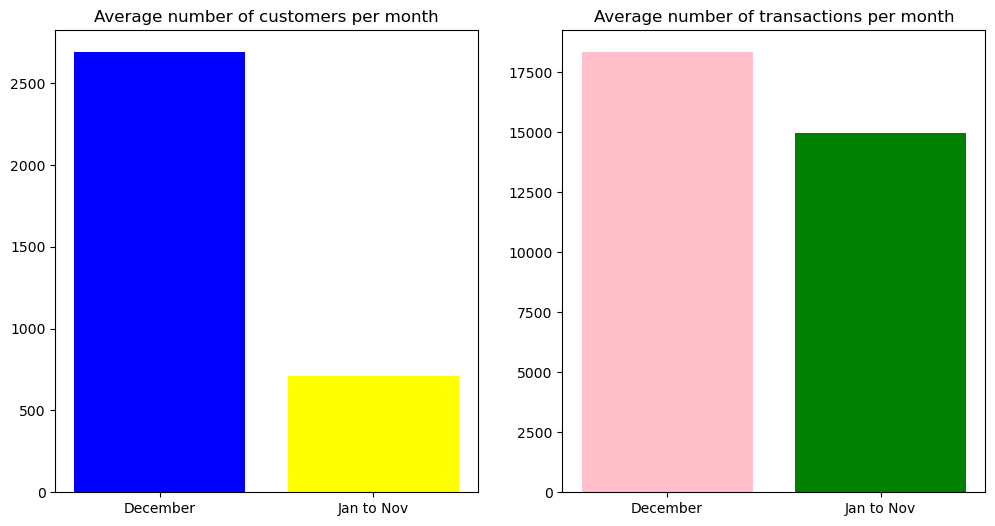

2689 711.2727272727273
18325 14959.818181818182
December Average Transaction Amount: $2.12
Jan to Nov Average Transaction Amount: $0.19


In [247]:
# 分析相似之处
december_customers = december_data['customer_id'].nunique()
jan_to_nov_customers = jan_to_nov_data['customer_id'].nunique()

december_transactions = december_data.shape[0]
jan_to_nov_transactions = jan_to_nov_data.shape[0]

december_avg_transaction_amount = december_data['product_retail_price'].mean()
jan_to_nov_avg_transaction_amount = jan_to_nov_data['product_retail_price'].mean()

december_product_frequency = december_data['product_id'].value_counts()
jan_to_nov_product_frequency = jan_to_nov_data['product_id'].value_counts()

december_customer_frequency = december_data['customer_id'].value_counts()
jan_to_nov_customer_frequency = jan_to_nov_data['customer_id'].value_counts()

# 比较差异之处
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['December', 'Jan to Nov'], [december_customers, jan_to_nov_customers/11], color=['blue', 'yellow'])
plt.title('Average number of customers per month')

plt.subplot(1, 2, 2)
plt.bar(['December', 'Jan to Nov'], [december_transactions, jan_to_nov_transactions/11], color=['pink', 'green'])
plt.title('Average number of transactions per month')
plt.show()
print(december_customers, jan_to_nov_customers/11)
print(december_transactions, jan_to_nov_transactions/11)
print(f"December Average Transaction Amount: ${december_avg_transaction_amount:.2f}")
print(f"Jan to Nov Average Transaction Amount: ${jan_to_nov_avg_transaction_amount/11:.2f}")

# 继续比较其他差异和统计测试



In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 将日期转换为日期时间对象
merged_data['transaction_date'] = pd.to_datetime(merged_data['transaction_date'])

# 拆分数据为12月和1至11月
december_data = merged_data[merged_data['transaction_date'].dt.month == 12]
jan_to_nov_data = merged_data[merged_data['transaction_date'].dt.month < 12]

# 购物频率和购物金额
december_shopping_frequency = december_data['customer_id'].value_counts()
jan_to_nov_shopping_frequency = jan_to_nov_data['customer_id'].value_counts()

december_shopping_amount = december_data.groupby('customer_id')['product_retail_price'].sum()
jan_to_nov_shopping_amount = jan_to_nov_data.groupby('customer_id')['product_retail_price'].sum()

# 热门商品
december_popular_products = december_data['product_name'].value_counts().head(10)
jan_to_nov_popular_products = jan_to_nov_data['product_name'].value_counts().head(10)

# 交易地点
december_popular_stores = december_data['store_id'].value_counts()
jan_to_nov_popular_stores = jan_to_nov_data['store_id'].value_counts()

# 顾客特征
december_customer_characteristics = december_data[['birthdate', 'marital_status', 'yearly_income', 'gender']].drop_duplicates()
jan_to_nov_customer_characteristics = jan_to_nov_data[['birthdate', 'marital_status', 'yearly_income', 'gender']].drop_duplicates()

# 购物时间
december_shopping_time = december_data['transaction_date'].dt.hour
jan_to_nov_shopping_time = jan_to_nov_data['transaction_date'].dt.hour




In [249]:
print("December Shopping Behavior:")
print(f"Total unique customers: {len(december_shopping_frequency)}")
print(f"Average shopping frequency: {december_shopping_frequency.mean()}")
print(f"Average shopping amount: {december_shopping_amount.mean()}")

December Shopping Behavior:
Total unique customers: 2689
Average shopping frequency: 6.814801041279286
Average shopping amount: 14.43873187058385


In [250]:
print("Top 10 popular products in December:")
december_popular_products

Top 10 popular products in December:


Hilltop 200 MG Ibuprofen            25
Booker Low Fat Cottage Cheese       23
Super Grape Jam                     23
American Sliced Ham                 23
Landslide Vegetable Oil             22
Moms Roasted Chicken                22
Sunset Paper Cups                   21
Hermanos Limes                      21
Tri-State Corn on the Cob           21
Top Measure White Zinfandel Wine    21
Name: product_name, dtype: int64

In [251]:
print("Popular stores in December:")
december_popular_stores

Popular stores in December:


21    1347
12    1291
8     1230
13    1225
17    1159
19    1123
1     1097
3     1051
15    1010
11    1000
7      875
16     856
10     846
24     818
4      721
6      672
23     373
20     336
9      330
18     316
2      177
14     173
5      172
22     127
Name: store_id, dtype: int64

In [254]:
print("Customer characteristics in December:")
december_customer_characteristics

Customer characteristics in December:


,birthdate,marital_status,yearly_income,gender
1,7/21/1949,S,$30K - $50K,M
22,9/16/1949,S,$50K - $70K,F
26,3/2/1970,S,$150K +,F
31,6/21/1921,M,$70K - $90K,M
78,11/17/1977,S,$30K - $50K,F
...,...,...,...,...
180574,9/13/1948,M,$50K - $70K,M
180622,9/5/1958,S,$70K - $90K,F
181180,7/20/1921,M,$30K - $50K,M
181828,8/15/1945,S,$90K - $110K,F


In [256]:
print("January to November Shopping Behavior:")
print(f"Total unique customers: {len(jan_to_nov_shopping_frequency)}")
print(f"Average shopping frequency: {jan_to_nov_shopping_frequency.mean()}")
print(f"Average shopping amount: {jan_to_nov_shopping_amount.mean()}")
print("Top 10 popular products in January to November:")
print(jan_to_nov_popular_products)

January to November Shopping Behavior:
Total unique customers: 7824
Average shopping frequency: 21.032464212678935
Average shopping amount: 44.52648645194272
Top 10 popular products in January to November:
Great English Muffins           143
Carrington Ice Cream            140
Nationeel Dried Apples          138
Nationeel Fudge Brownies        138
Ebony Mixed Nuts                137
Excellent Orange Juice          137
Booker String Cheese            137
Steady Childrens Cold Remedy    136
Moms Roasted Chicken            135
Super Chunky Peanut Butter      134
Name: product_name, dtype: int64


In [258]:
print("Popular stores in January to November:")
print(jan_to_nov_popular_stores)


Popular stores in January to November:
12    11924
8     11784
19    11647
13    11293
17    11257
21    10990
15     8481
16     8264
11     8022
10     7898
3      7671
7      7644
24     7637
4      7546
1      7376
6      7288
9      3487
18     3153
23     3082
20     2985
22     1351
5      1298
14     1268
2      1212
Name: store_id, dtype: int64


In [259]:
print("Customer characteristics in January to November:")
print(jan_to_nov_customer_characteristics)

Customer characteristics in January to November:
         birthdate marital_status  yearly_income gender
0        4/17/1924              S    $10K - $30K      F
2       10/21/1957              M  $110K - $130K      M
3         2/6/1958              M    $70K - $90K      F
4       10/26/1976              M    $50K - $70K      M
5        5/14/1970              S    $50K - $70K      M
...            ...            ...            ...    ...
176997    7/7/1966              S    $30K - $50K      F
178406   6/23/1916              M    $10K - $30K      F
178523  10/25/1942              S    $30K - $50K      F
182023  12/20/1948              S    $50K - $70K      F
182200   9/16/1977              S    $10K - $30K      M

[7747 rows x 4 columns]


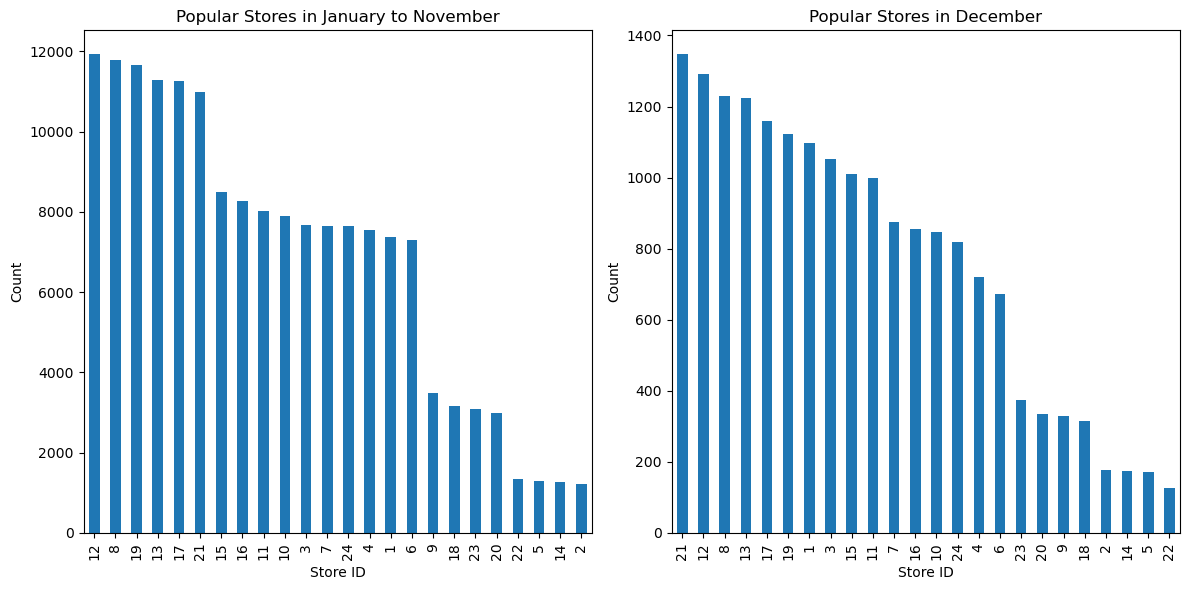

In [261]:
import matplotlib.pyplot as plt

# 绘制1至11月的热门商店柱状图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
jan_to_nov_popular_stores.plot(kind='bar', title="Popular Stores in January to November")
plt.xlabel("Store ID")
plt.ylabel("Count")

# 绘制12月的热门商店柱状图
plt.subplot(1, 2, 2)
december_popular_stores.plot(kind='bar', title="Popular Stores in December")
plt.xlabel("Store ID")
plt.ylabel("Count")

# 显示图形
plt.tight_layout()
plt.show()


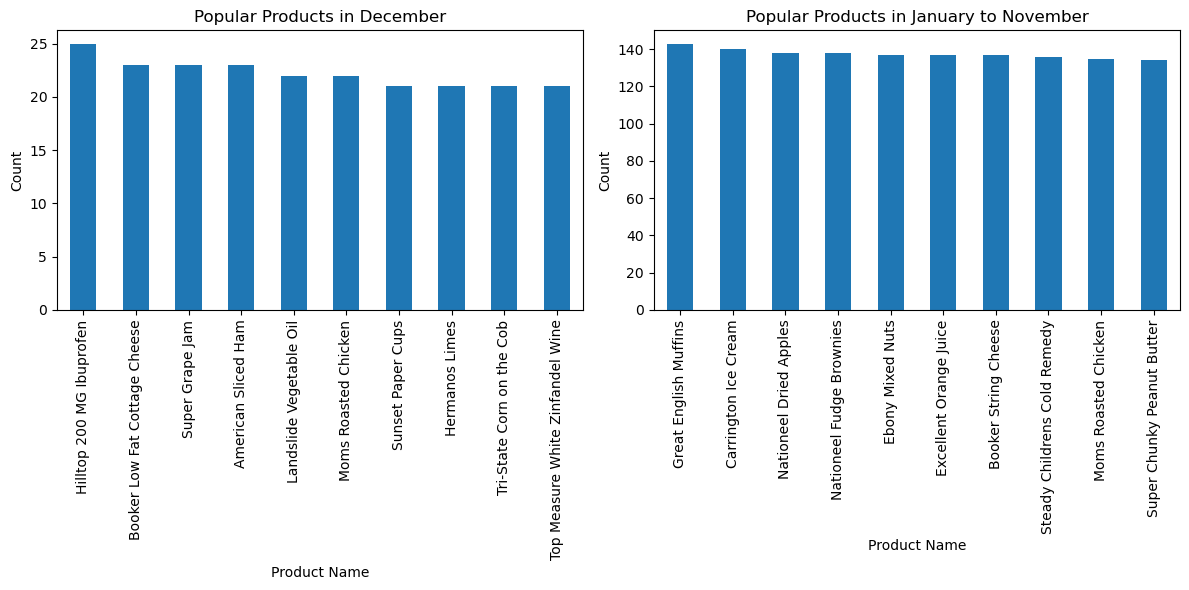

In [262]:
import matplotlib.pyplot as plt

# 绘制12月的热门商品柱状图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
december_popular_products.plot(kind='bar', title="Popular Products in December")
plt.xlabel("Product Name")
plt.ylabel("Count")

# 绘制1至11月的热门商品柱状图
plt.subplot(1, 2, 2)
jan_to_nov_popular_products.plot(kind='bar', title="Popular Products in January to November")
plt.xlabel("Product Name")
plt.ylabel("Count")

# 旋转X轴标签，以避免重叠
plt.xticks(rotation=90)

# 显示图形
plt.tight_layout()
plt.show()
